# DATA VISUALIZATION AND DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Data = pd.read_csv('CYBER.csv')
Data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [4]:
Data.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


In [5]:
Data['cyberbullying_type'] = Data['cyberbullying_type'].map({'religion': 1, 'age':2,'gender':3,'ethnicity':4,'ethnicity':5,'other_cyberbullying':6})

<Axes: xlabel='cyberbullying_type', ylabel='count'>

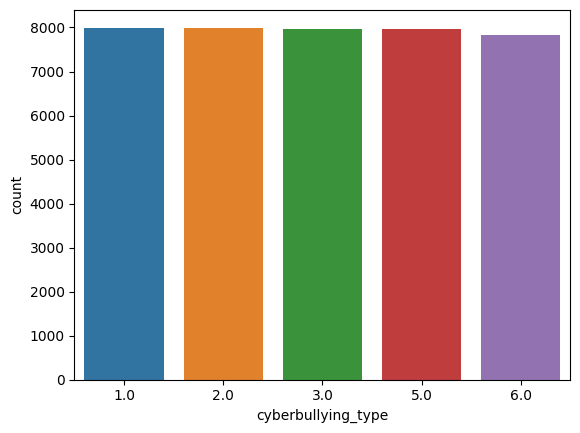

In [6]:
sns.countplot(x='cyberbullying_type',data=Data)

(array([7998.,    0., 7992.,    0., 7973.,    0.,    0.,    0., 7961.,
        7823.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

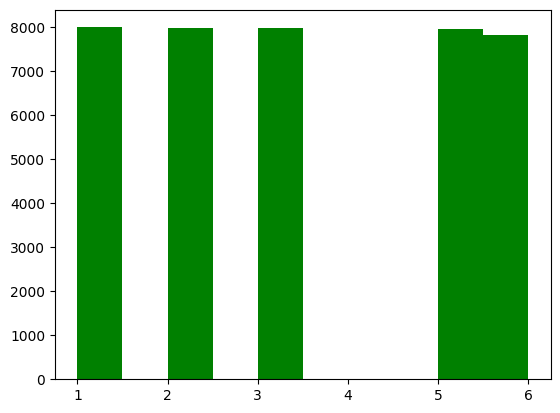

In [7]:
plt.hist(Data['cyberbullying_type'],color='green')

<Axes: ylabel='Density'>

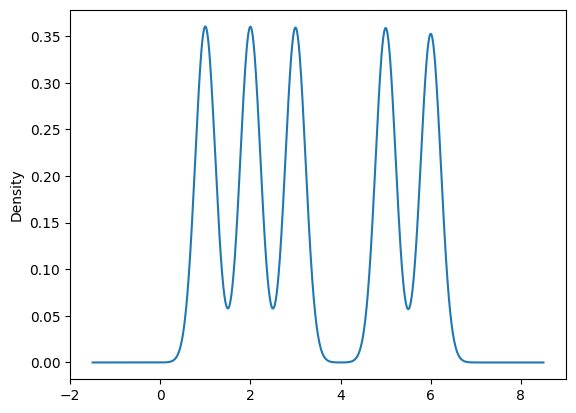

In [8]:
Data['cyberbullying_type'].plot(kind='density')

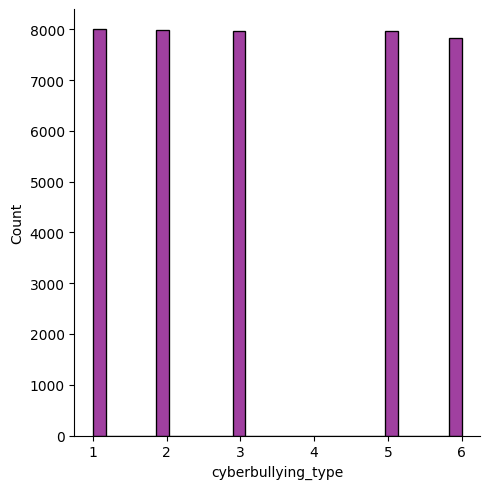

In [9]:
sns.displot(Data['cyberbullying_type'], color='purple') 

<Axes: >

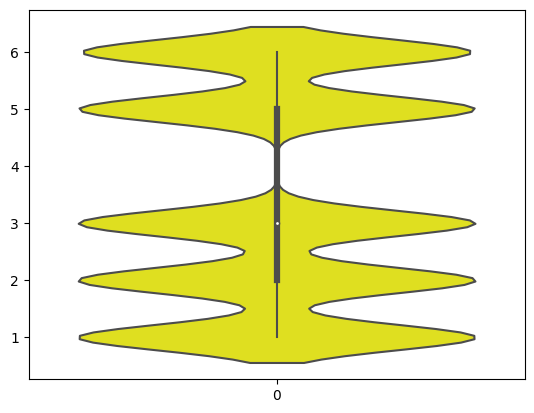

In [10]:
sns.violinplot(Data['cyberbullying_type'], color='yellow') 

<Axes: xlabel='cyberbullying_type', ylabel='Proportion'>

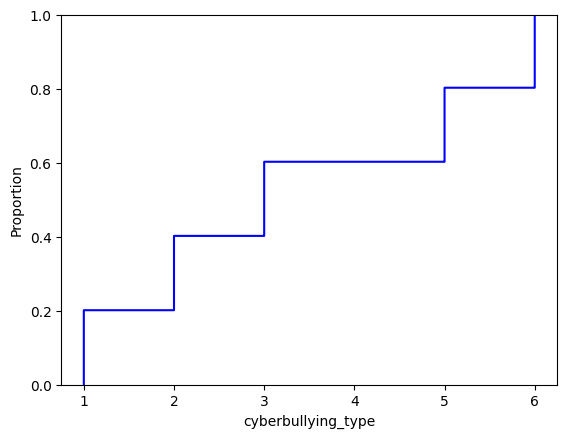

In [11]:
sns.ecdfplot(Data['cyberbullying_type'], color='blue') 

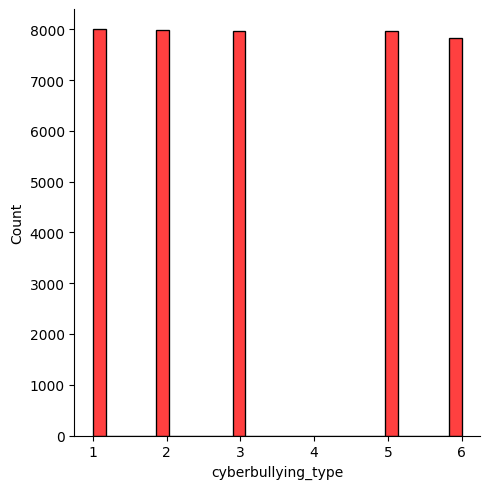

In [12]:
sns.displot(Data['cyberbullying_type'], color='RED') 

In [13]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [14]:
# Define preprocess function for text preprocessing

def preprocess_text(text):
    
    # Check for NaN values and handle them
    
    if pd.isnull(text):
        return ""
    
    # Convert to lowercase
    
    text = text.lower()
    
    # Remove special characters and digits
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization and remove stop words
    
    stop_words = set(stopwords.words('english'))
    
    words = [word for word in word_tokenize(text) if word not in stop_words]
    
    # Stemming
    
    ps = PorterStemmer()
    
    words = [ps.stem(word) for word in words]
    
    # Join the preprocessed words back into a single string
    
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

In [15]:
Data['tweet_text'] = Data['tweet_text'].apply(preprocess_text)

In [16]:
from sklearn.model_selection import train_test_split

X,X_test,y,y_test = train_test_split(Data.loc[:,'tweet_text':],Data['cyberbullying_type'],test_size=0.2)

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 799.5, 799.5, -0.5)

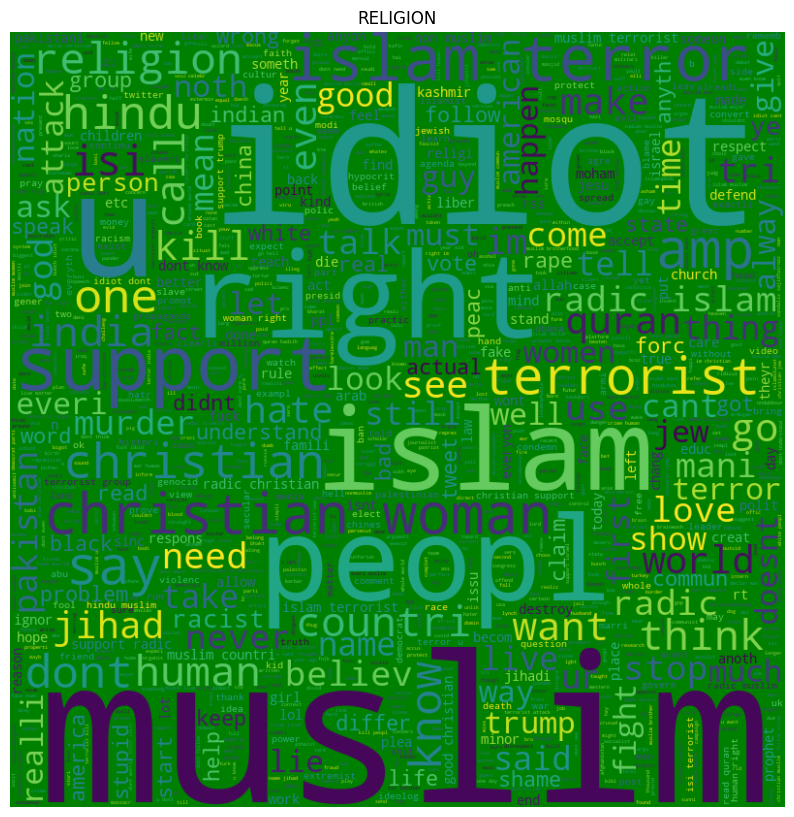

In [18]:
religion = ' '.join(Data.loc[Data['cyberbullying_type'] == 1, 'tweet_text'].values)
religion_text = WordCloud(background_color='GREEN',max_words=2000,width = 800, height = 800).generate(religion)

plt.figure(figsize=[10,30])

plt.imshow(religion_text,interpolation='bilinear')
plt.title('RELIGION')
plt.axis('off')

Text(0.5, 1.0, 'AGE')

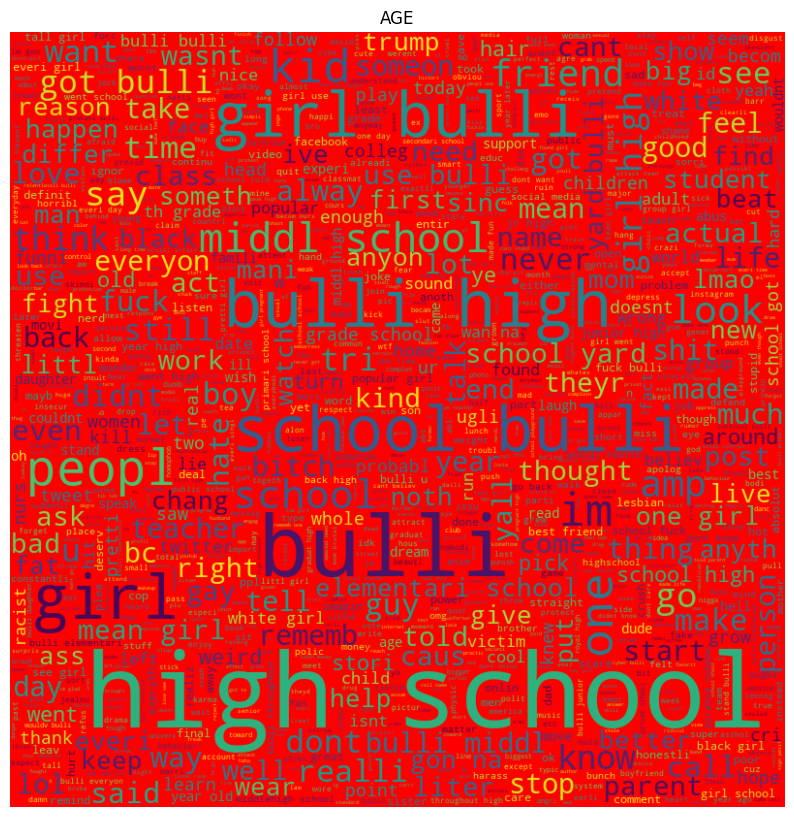

In [20]:
age = ' '.join(Data.loc[Data['cyberbullying_type'] == 2, 'tweet_text'].values)
age_text = WordCloud(background_color='RED',max_words=2000,width = 800, height = 800).generate(age)

plt.figure(figsize=[10,30])

plt.imshow(age_text, interpolation='bilinear')
plt.axis('off')
plt.title('AGE')

Text(0.5, 1.0, 'GENDER')

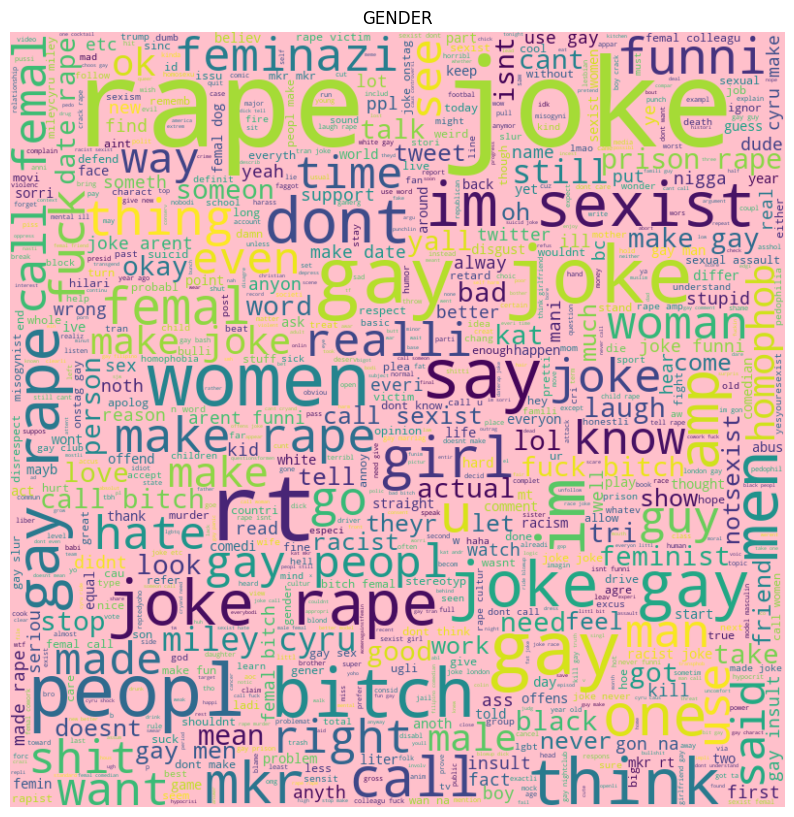

In [21]:
gender = ' '.join(Data.loc[Data['cyberbullying_type'] == 3, 'tweet_text'].values)
gender_text = WordCloud(background_color='PINK',max_words=2000,width = 800, height = 800).generate(gender)

plt.figure(figsize=[10,30])

plt.imshow(gender_text, interpolation='bilinear')
plt.axis('off')
plt.title('GENDER')

Text(0.5, 1.0, 'OTHER CYBERBULLYING')

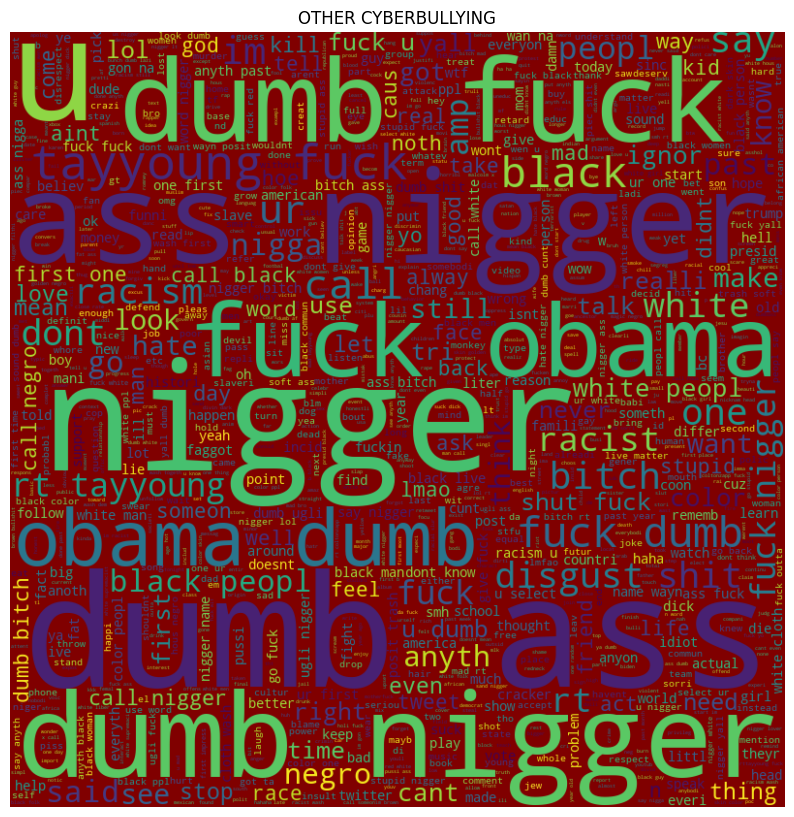

In [23]:
other_cyberbullying = ' '.join(Data.loc[Data['cyberbullying_type'] == 5, 'tweet_text'].values)
other_cyberbullying_text = WordCloud(background_color='MAROON',max_words=2000,width = 800, height = 800).generate(other_cyberbullying)

plt.figure(figsize=[10,30])

plt.imshow(other_cyberbullying_text, interpolation='bilinear')
plt.axis('off')
plt.title('OTHER CYBERBULLYING')